# Congratulations on reaching the final part of the homework!
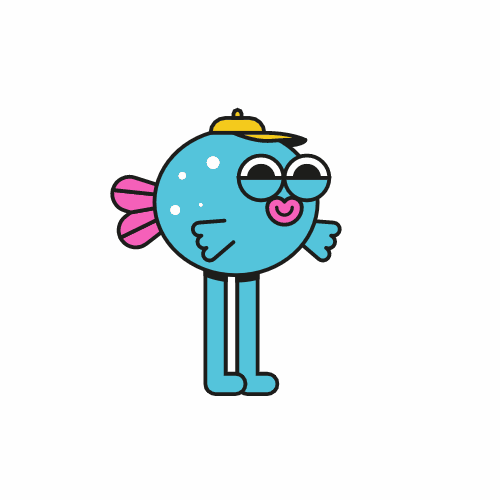
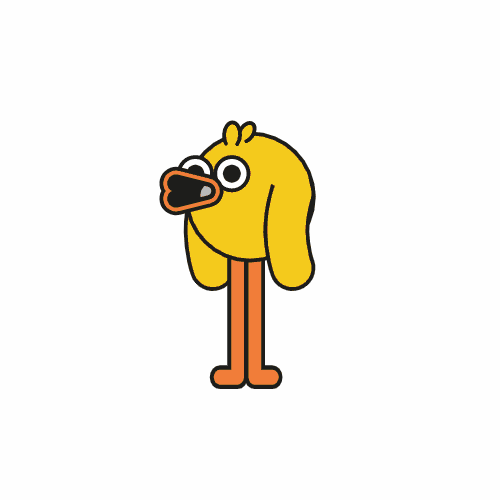

## Visualization of my Organization's training results

Name: [ Essi Tallgren ]

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [152]:
outcomes = pd.read_csv("visualize_outcomes.csv")
learning_novice = pd.read_csv("visualize_novice_learning_sum.csv")
learning_standard = pd.read_csv("visualize_standard_learning_sum.csv")
learning_experienced = pd.read_csv("visualize_experienced_learning_sum.csv")


In [153]:
# check that data was loaded correctly
print(learning_novice.head())
print(learning_standard.head())
print(learning_experienced.head())


             timestamp  fails  successes
0  2022-02-16 23:55:07     16          5
1  2022-02-23 23:55:07     10          8
2  2022-03-02 23:55:07     19          5
3  2022-03-09 23:55:07     14          4
4  2022-03-16 23:55:07     16          2
             timestamp  fails  successes
0  2022-02-16 23:55:07      8         21
1  2022-02-23 23:55:07      5         30
2  2022-03-02 23:55:07      4         32
3  2022-03-09 23:55:07      7         27
4  2022-03-16 23:55:07      2         30
             timestamp  fails  successes
0  2022-02-16 23:55:07      4         19
1  2022-02-23 23:55:07      0         25
2  2022-03-02 23:55:07      0         24
3  2022-03-09 23:55:07      1         24
4  2022-03-16 23:55:07      0         24


In [154]:
# Convert timestamps to numpy datetime object so that the plot looks cleaner.
time = pd.to_datetime(learning_novice['timestamp'])

# Make a list of numbers in range of the timestamp list. This is to make the trend lines, as the
# polyfit function takes in only numeric data.
times_num = list(range(len(time)))

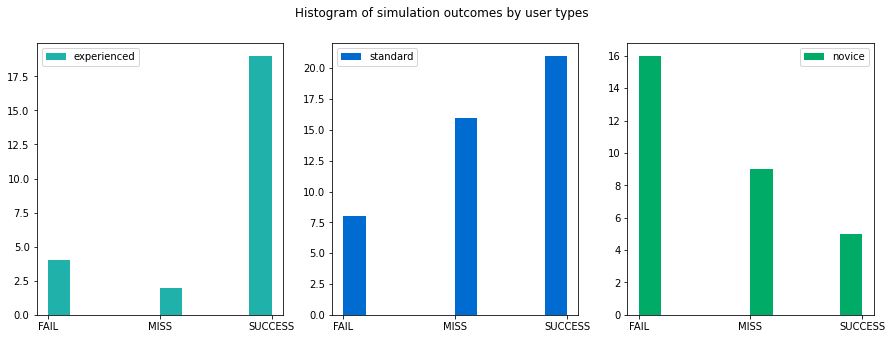

In [155]:
# A simple histogram of fails, misses and successes

# In this visualization, the histograms are put in different subplots, because the outcome amounts are not
# that easily comparable if they are in the same figure (there are a lot more standard users than experienced
# and novice users)

novice_data = outcomes.loc[outcomes['type'] == 'Novice']
standard_data = outcomes.loc[outcomes['type'] == 'Standard']
experienced_data = outcomes.loc[outcomes['type'] == 'Experienced']

plt.figure(figsize=(15,5))

plt.subplot(131)
plt.hist(experienced_data['outcome'], label = 'experienced', color = '#20b2aa')
plt.legend(loc = 'upper left')

plt.subplot(132)
plt.hist(standard_data['outcome'], label = 'standard', color = '#006bd1')
plt.legend(loc = 'upper left')

plt.subplot(133)
plt.hist(novice_data['outcome'], label = 'novice', color = '#00aa67')
plt.legend(loc = 'upper right')

plt.suptitle('Histogram of simulation outcomes by user types')


plt.show()

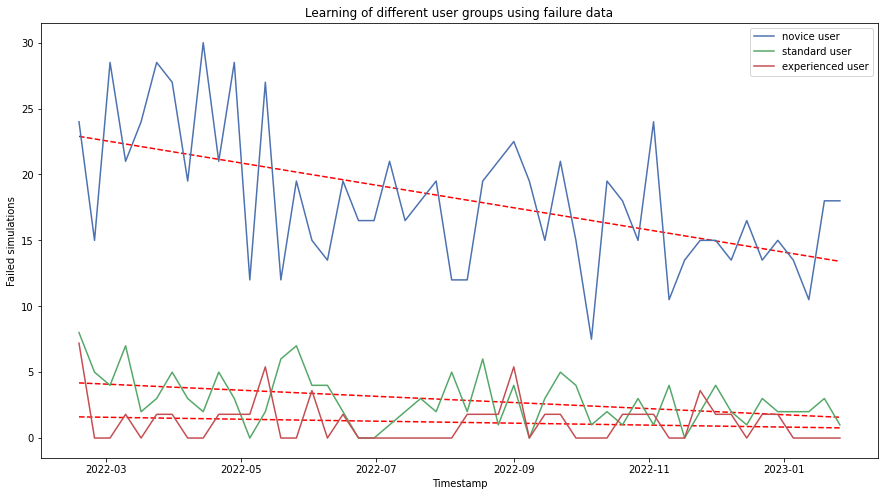

In [158]:
# TODO(Task 4):
# Create your own visualization based on your data and what you want to show/analyze
# Feel free to get use any plotting library you're comfortable with, just remember to add it to the requirements.txt

# example visualization, we're sure you can do better!


# Timestamped data of novice, standard and experienced users in the same plot.

# To make the results visually comparable, I calculated the novice users' fails as: fails*1.5 (30% of the users so there
# are 50% more standard users which are 45% of the users) and experienced users' fails as: fails*1.8 (25% of the
# users)

# First I use polyfit to get the trend lines for the outcome data

z = np.polyfit(times_num, learning_novice['fails']*1.5, 1)
p = np.poly1d(z)

z2 = np.polyfit(times_num, learning_standard['fails'], 1)
p2 = np.poly1d(z2)

z3 = np.polyfit(times_num, learning_experienced['fails']*1.8, 1)
p3 = np.poly1d(z3)


plt.figure(figsize=(15, 8))

plt.plot(time, p(times_num), 'r--')
plt.plot(time, p2(times_num), 'r--')
plt.plot(time, p3(times_num), 'r--')

plt.plot(time, (learning_novice['fails'])*1.5, '-', label = 'novice user')
plt.plot(time, learning_standard['fails'], '-', label = 'standard user')
plt.plot(time, (learning_experienced['fails'])*1.8, '-', label = 'experienced user')

plt.legend(loc = 'upper right')
plt.title('Learning of different user groups using failure data')
plt.xlabel('Timestamp')
plt.ylabel('Failed simulations')
plt.show()

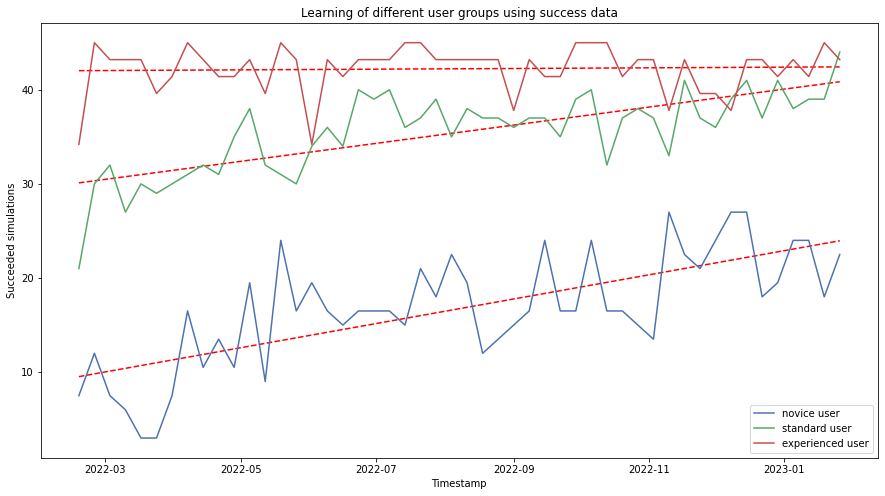

In [157]:
z = np.polyfit(times_num, learning_novice['successes']*1.5, 1)
p = np.poly1d(z)

z2 = np.polyfit(times_num, learning_standard['successes'], 1)
p2 = np.poly1d(z2)

z3 = np.polyfit(times_num, learning_experienced['successes']*1.8, 1)
p3 = np.poly1d(z3)

plt.figure(figsize=(15, 8))
plt.plot(time, p(times_num), 'r--')
plt.plot(time, p2(times_num), 'r--')
plt.plot(time, p3(times_num), 'r--')

plt.plot(time, (learning_novice['successes'])*1.5, '-', label = 'novice user')
plt.plot(time, learning_standard['successes'], '-', label = 'standard user')
plt.plot(time, (learning_experienced['successes'])*1.8, '-', label = 'experienced user')

plt.legend(loc = 'lower right')
plt.title('Learning of different user groups using success data')
plt.xlabel('Timestamp')
plt.ylabel('Succeeded simulations')
plt.show()

## My short analysis of the result

### TODO:

In the histograms of outcomes of the simulations we can see how the successes, misses, and failures are distributed. For the experienced user, the success rate is very high and the misses and failures give out similar bars. For the standard user the miss and success bars are almost the same height, indicating that the users don't caught by the phishing emails that often, but with the lack of experience, are not reporting them as much as they should. In the line plots it can be seen that the successes increase significantly as the training goes on, which tells us that at the beginning most of the standard users just ignore the suscpicious emails. For the novice users, the fail bar is high and the success bar is very low. It can be seen that they succeed about 1/3 of the simulations in total. Therefore they need significantly more training than the other user types.

In the above learning figures, we can see the progress of learning in the different user types. The total number of users is 100 and the number of standard users is 45. Knowing that, and that the other user types are scaled to the standard user type data, we can see how big of a portion of users in different user types fail the simulations and succeed in the simulations.

For the experienced user, there is not much of a difference in performance. This is because the training has an almost trivial effect, as they already know how to react to phishing emails. There is room for human error, which might lead to a small total increase or decrease in performance. The standard user starts from a moderate success rate and as time goes on, the trend of their performance comes close to the experienced user's performance. This indicates, that a standard user, with some experience with computers, can improve their performance to very good results. The novice user starts from a point, where they have next to no experience or knowledge on phishing or the use of computers. Their success rate at the beginning of the training is very low. After almost a year, they have a total success rate of a little under 50%. This indicates, that they are slow to learn the needed skills. This might be because they must learn other relevant skills at the same time.

Aside from the trend lines, we can see that the performance of the users is very inconsistent. This can be the caused by the difference in how the phishing emails are composed. The noise in the data can also be caused by the many different factors that affect people on daily basis.

For future development of such analysis, user data, like age and educational background, could be used to produce interesting results. Also, basing learning rates and division of user types on a real example would be a good addition.

# Well done! 

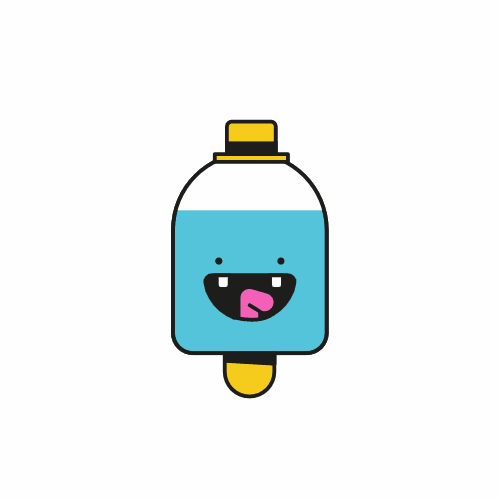

### *Remember to reward yourself for your good work!* 